## Predict Quarter-finals World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(609, 19)
(4, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-09,Croatia,Brazil,83,85,82,85,78,83,12,1,1645.64,1841.30,FIFA World Cup,Al Rayyan,Qatar,True
1,2022-12-09,Netherlands,Argentina,83,85,83,83,83,83,8,3,1694.51,1773.88,FIFA World Cup,Lusail,Qatar,True
2,2022-12-10,Morocco,Portugal,76,83,74,85,78,84,22,9,1563.50,1676.56,FIFA World Cup,Doha,Qatar,True
3,2022-12-10,England,France,86,86,83,84,83,83,5,4,1728.47,1759.78,FIFA World Cup,Al Khor,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = df_internationalmatches.iloc[:,3:].astype(float)

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float)

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 - 120 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    # The model is still a secret until all World Cup matches are finished
    
    
    
    
    
    
])

In [12]:
model.compile(# Still secret
              
              
              )

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
61/61 [==============================] - 1s 1ms/step - loss: 26.8989 - accuracy: 0.3875
Epoch 2/500
61/61 [==============================] - 0s 1ms/step - loss: 7.4816 - accuracy: 0.4007
Epoch 3/500
61/61 [==============================] - 0s 1ms/step - loss: 9.3264 - accuracy: 0.4187
Epoch 4/500
61/61 [==============================] - 0s 1ms/step - loss: 6.9329 - accuracy: 0.4220
Epoch 5/500
61/61 [==============================] - 0s 2ms/step - loss: 7.1118 - accuracy: 0.4122
Epoch 6/500
61/61 [==============================] - 0s 2ms/step - loss: 7.2627 - accuracy: 0.3875
Epoch 7/500
61/61 [==============================] - 0s 2ms/step - loss: 7.7723 - accuracy: 0.4007
Epoch 8/500
61/61 [==============================] - 0s 2ms/step - loss: 9.7710 - accuracy: 0.3793
Epoch 9/500
61/61 [==============================] - 0s 2ms/step - loss: 6.1848 - accuracy: 0.4023
Epoch 10/500
61/61 [==============================] - 0s 1ms/step - loss: 6.0804 - accuracy: 0.4105
Epoch 11

61/61 [==============================] - 0s 1ms/step - loss: 2.4988 - accuracy: 0.4516
Epoch 84/500
61/61 [==============================] - 0s 1ms/step - loss: 2.4963 - accuracy: 0.4647
Epoch 85/500
61/61 [==============================] - 0s 1ms/step - loss: 2.4345 - accuracy: 0.5107
Epoch 86/500
61/61 [==============================] - 0s 1ms/step - loss: 2.4570 - accuracy: 0.4926
Epoch 87/500
61/61 [==============================] - 0s 2ms/step - loss: 2.4342 - accuracy: 0.4581
Epoch 88/500
61/61 [==============================] - 0s 2ms/step - loss: 2.3937 - accuracy: 0.4910
Epoch 89/500
61/61 [==============================] - 0s 2ms/step - loss: 2.3495 - accuracy: 0.5041
Epoch 90/500
61/61 [==============================] - 0s 2ms/step - loss: 2.3328 - accuracy: 0.4975
Epoch 91/500
61/61 [==============================] - 0s 1ms/step - loss: 2.3359 - accuracy: 0.5041
Epoch 92/500
61/61 [==============================] - 0s 2ms/step - loss: 2.4779 - accuracy: 0.4516
Epoch 93/500


61/61 [==============================] - 0s 1ms/step - loss: 1.0487 - accuracy: 0.5222
Epoch 246/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0498 - accuracy: 0.5189
Epoch 247/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0485 - accuracy: 0.5107
Epoch 248/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0427 - accuracy: 0.5238
Epoch 249/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.5172
Epoch 250/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0396 - accuracy: 0.5222
Epoch 251/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0355 - accuracy: 0.5320
Epoch 252/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0449 - accuracy: 0.5107
Epoch 253/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0402 - accuracy: 0.5205
Epoch 254/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0376 - accuracy: 0.5205
Epoc

61/61 [==============================] - 0s 1ms/step - loss: 1.0043 - accuracy: 0.5222
Epoch 408/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.5255
Epoch 409/500
61/61 [==============================] - 0s 3ms/step - loss: 1.0119 - accuracy: 0.5304
Epoch 410/500
61/61 [==============================] - 0s 3ms/step - loss: 1.0047 - accuracy: 0.5271
Epoch 411/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.5320
Epoch 412/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0045 - accuracy: 0.5255
Epoch 413/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0102 - accuracy: 0.5156
Epoch 414/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9988 - accuracy: 0.5386
Epoch 415/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0043 - accuracy: 0.5304
Epoch 416/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.5140
Epoc

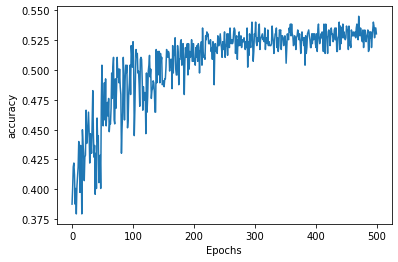

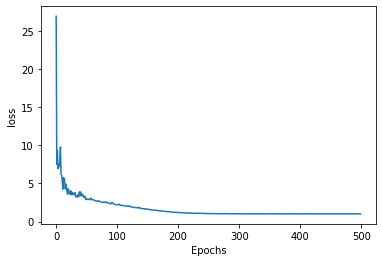

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Quarter-finals World Cup 2022 Match in 90 - 120 Minutes')
print('==========================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Quarter-finals World Cup 2022 Match in 90 - 120 Minutes
Croatia vs Brazil
Home Win: 0.19425  Draw: 0.27471  Away Win: 0.53103

Netherlands vs Argentina
Home Win: 0.25197  Draw: 0.29661  Away Win: 0.45142

Morocco vs Portugal
Home Win: 0.23083  Draw: 0.28835  Away Win: 0.48081

England vs France
Home Win: 0.31048  Draw: 0.30689  Away Win: 0.38263

